# 4: Linear regression

In this section we explore perhaps the simplest form of machine learnig, the venerable linear regression. 

Linear regression is simply fitting models of the form

$y = mx + c$

to our data. Here, as usual, $y$ is the dependent variable, $x$ is the independent variable. $m$ is the slope of the line and $c$ the intercept.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Fit a simple model

Let us set up some data that we want to fit. We will generate the data from a known equation:

$y = 2x + 5$

and we will add some random noise to the observed datapoints.

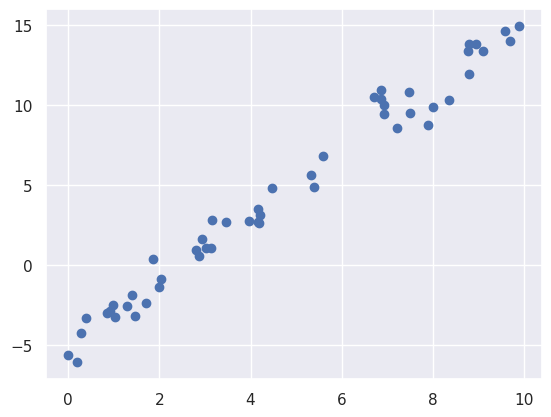

In [16]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We can now use the built in `LinearRegression` method from `scikit-learn` to fit the data. Once we have fitted the data we can replot the data with the model prediction.

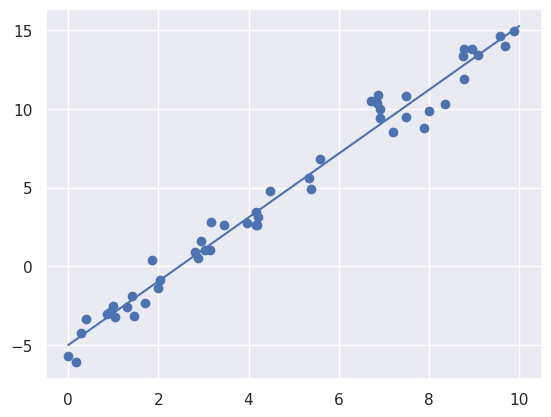

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

We can also look at the parameters that the model has arrived at, the slope (`model.coef_[0]`) and the intercept (`model.intercept_`). We see that the values fitted by the model are rather close to the values used to generate the data.

In [18]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


## Calculate some statistics on a test set

As we saw in the section on model selection, we should always test our model on independent data, that was not used in the fitting. We generate a test set and then plot the model with the test data.

In [24]:
xtest = 10 * rng.rand(30)
ytest = 2 * xtest - 5 + rng.randn(30)
ypred = model.predict(xtest[:, np.newaxis])

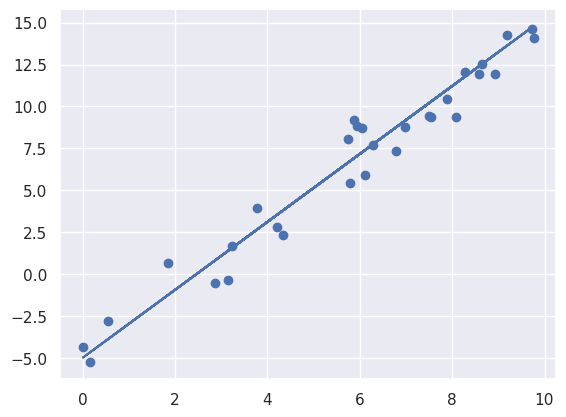

In [25]:
plt.scatter(xtest, ytest)
plt.plot(xtest, ypred)

We now calculate some metrics to evaluate the model performance. Since we are doing linear regression, mean squared error, root mean squared and  $r^2$ are useful metrics.

Root mean squared error may be preferred sometime to mean squared error as it gives the metric in the same units as the underlying data.

$r^2$ is often used to evaluate models - but one should exercise some caution in using $r^2$ - here is an interesting discussion of some of the limitations: [Is R-squared Useless?](https://data.library.virginia.edu/is-r-squared-useless/).

We will use the metrics from `scikit-learn` to calculate these values between the predicted and true values of the test set.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', mean_squared_error(ypred, ytest, squared=False))
print('r-squared:', r2_score(ypred, ytest))

Mean squared error: 1.3746868656316784
Root mean squared error: 1.1724704114098907
r-squared: 0.95687909541779


## Multiple linear regression

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$y=a0+a1x1+a2x2+⋯$

where there are multiple x values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print('Shape of data to fit', X.shape)
print(model.intercept_)
print(model.coef_)

Shape of data to fit (100, 3)
0.5000000000000113
[ 1.5 -2.   1. ]


## Basis function regression

Here we convert our single variable $x$ to a an expression of several variables e.g. $x_1, x_2, x_3, \cdots$

This is particularly useful if you know that the relationship between the $x$ and $y$ is not linear, but you know a function (or basis) that can capture that relationship.

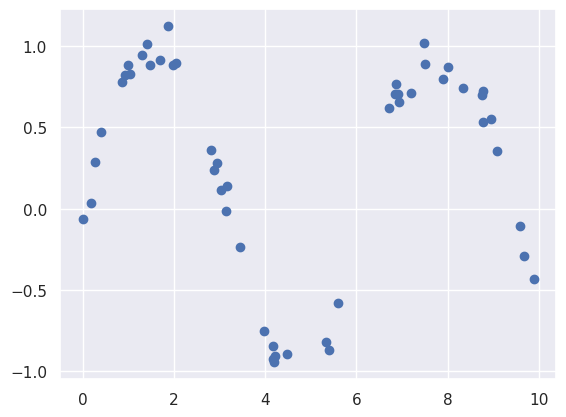

In [34]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

We clearly can't fit this with a simple $y = mx + c$ - let's try converting our $x$ into a polynomial series $x = a_0+a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5 + a_6x^6$

We can use the `PolynomialFeatures` class from scikit-learn - let's put it in a pipeline, like we did before.

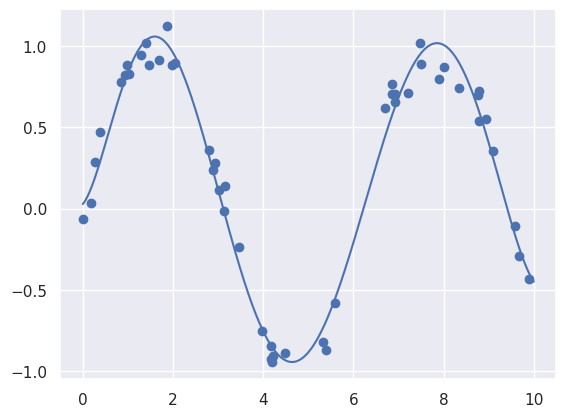

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [37]:
xtest = 10 * rng.rand(30)
ytest = np.sin(xtest) + 0.1 * rng.randn(30)
ypred = poly_model.predict(ytest[:, np.newaxis])

print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', mean_squared_error(ypred, ytest, squared=False))
print('r-squared:', r2_score(ypred, ytest))

Mean squared error: 1.2046283258545243
Root mean squared error: 1.097555614014399
r-squared: -2.461231803902191


### Multiple regression

Lets try to develop a multiple linear regression model for predicting the index price from the data below

In [38]:
import pandas as pd

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

We can explore the date using a pairplot to see what variables might have linear relation to index_price

In [39]:
import seaborn as sns

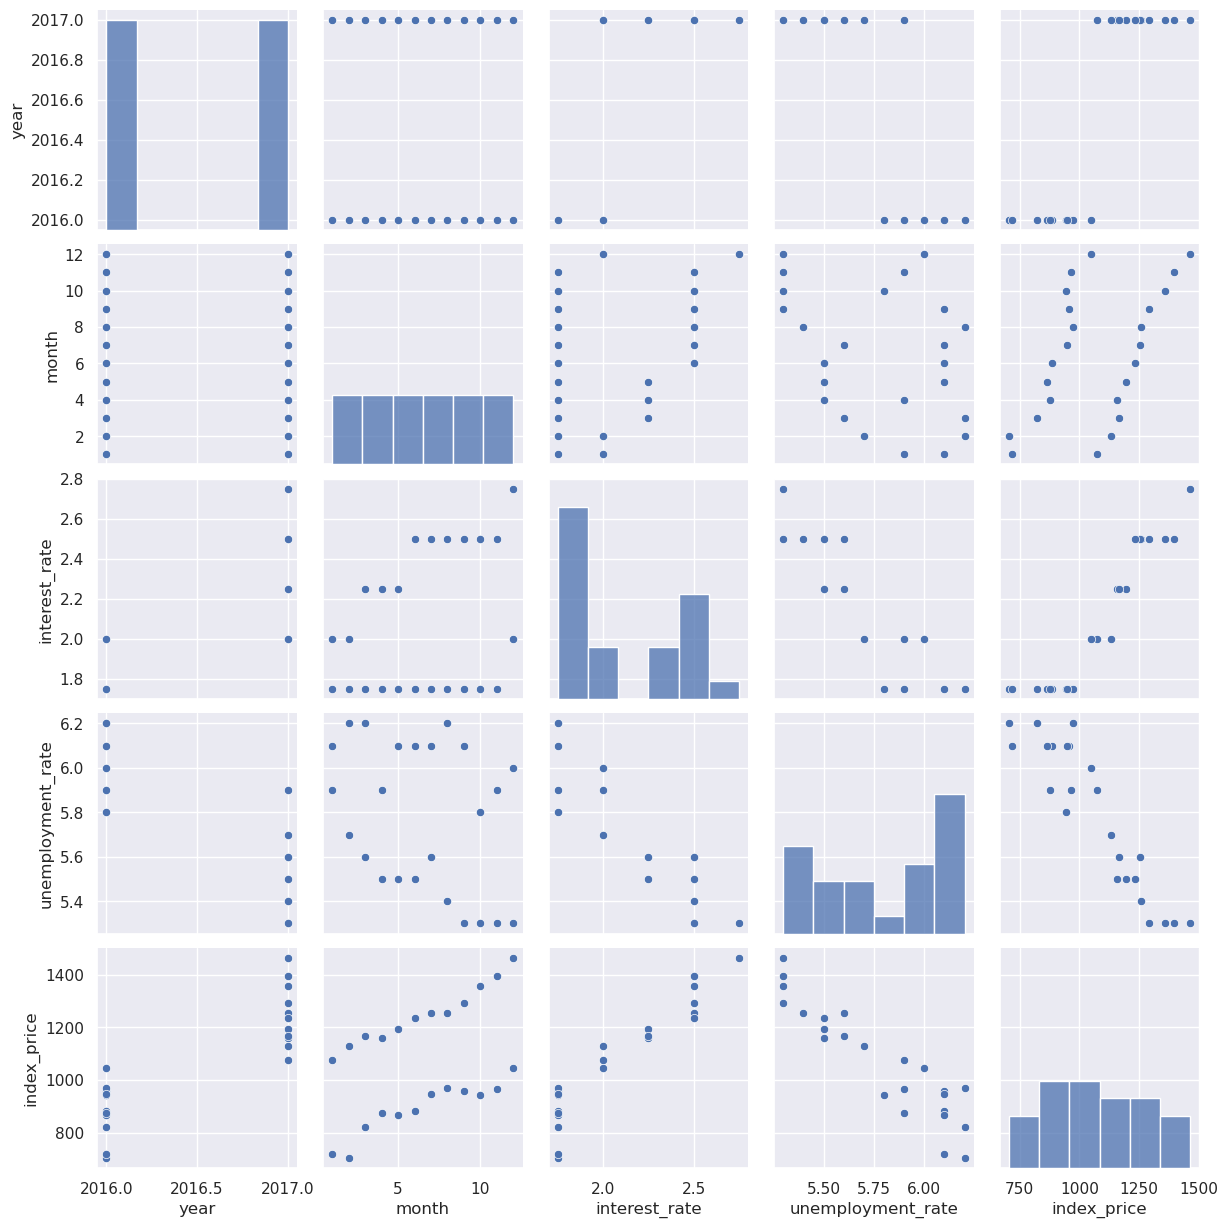

In [40]:
sns.pairplot(df)

Inerest rate and unemployment rate seem to have a relationship. Month is also related somewhat, but it looks like a more complex than linear relatioship, so for now we will just use interest_rate and unemplyment as the independet variables.

Let's now fit the multiple linear regression.

In [48]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']

from sklearn.model_selection import train_test_split
# split the data with 80% in train set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,
                                  train_size=0.5)
 
# with sklearn
regr = LinearRegression()
regr.fit(xtrain, ytrain)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1141.1538024971637
Coefficients: 
 [ 408.01475596 -158.2661748 ]


In [49]:
ypred = regr.predict(xtest)

In [50]:
print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', mean_squared_error(ypred, ytest, squared=False))
print('r-squared:', r2_score(ypred, ytest))

Mean squared error: 7705.7212307796
Root mean squared error: 87.78223755851522
r-squared: 0.6887606394455656


 We could also try individual regressions

In [51]:
x = df[['interest_rate']]
y = df['index_price']

# split the data with 80% in train set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,
                                  train_size=0.5)
 
# with sklearn
regr = LinearRegression()
regr.fit(xtrain, ytrain)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

ypred = regr.predict(xtest)

print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', mean_squared_error(ypred, ytest, squared=False))
print('r-squared:', r2_score(ypred, ytest))

Intercept: 
 -86.3608247422685
Coefficients: 
 [556.16494845]
Mean squared error: 9016.89454245935
Root mean squared error: 94.95733011442218
r-squared: 0.6427482319976721


In [52]:
x = df[['unemployment_rate']]
y = df['index_price']

# split the data with 80% in train set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,
                                  train_size=0.5)
 
# with sklearn
regr = LinearRegression()
regr.fit(xtrain, ytrain)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

ypred = regr.predict(xtest)

print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', mean_squared_error(ypred, ytest, squared=False))
print('r-squared:', r2_score(ypred, ytest))

Intercept: 
 4313.884991374354
Coefficients: 
 [-557.71707878]
Mean squared error: 10860.733717500003
Root mean squared error: 104.21484403625044
r-squared: 0.5585616641154836


We can see that the r-squared with multiple regression is better than either of the individual regressions.